## Adversarial Search



## Types of Games

What about complete and incomplete information?


-> An important subset of sequential games consists of games of
perfect information. A game is one of perfect information if all
players know the moves previously made by all other players.

-> Complete information requires that every player know the
strategies and payoffs available to the other players but not
necessarily the actions taken.



## Types of Games

-> Cooperative /
Non-cooperative

-> Symmetric / Asymmetric

-> Zero-sum / Non-zero-sum

-> Simultaneous / Sequential

-> Perfect information and
imperfect information

-> Combinatorial games

-> Infinitely long games

-> Discrete and continuous
games
-> Differential games

-> Evolutionary game theory

-> Stochastic outcomes (and
relation to other fields)

-> Metagames

-> Pooling games

-> Mean field game theory


#### Game tree (2-player, deterministic, turns)


## Minimax

Perfect play for deterministic (and perfect-information) games

Idea: choose move to position with highest minimax value
= best achievable payoff against best play

E.g., 2-ply game:




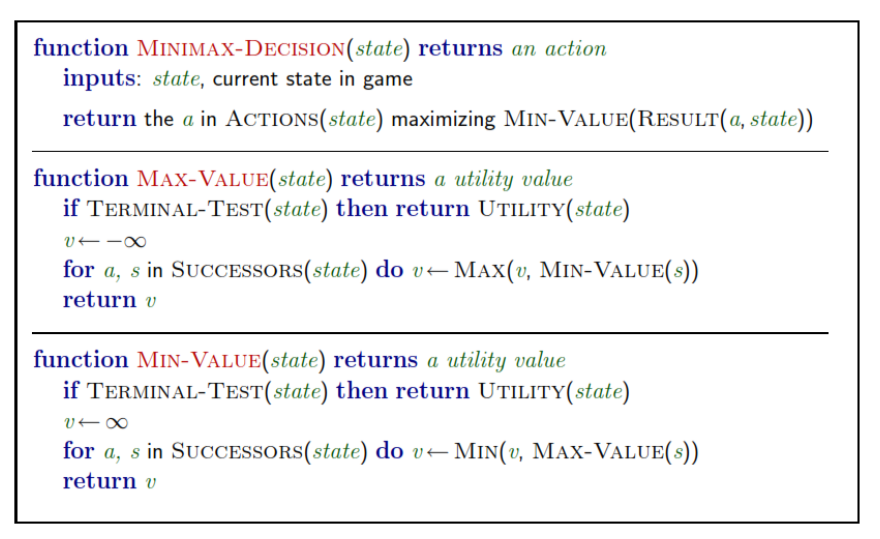

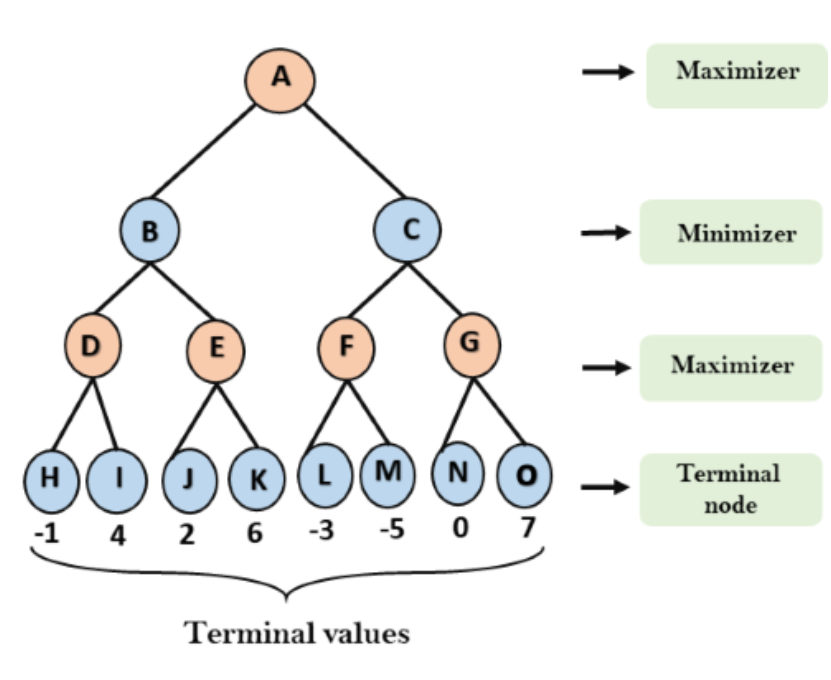

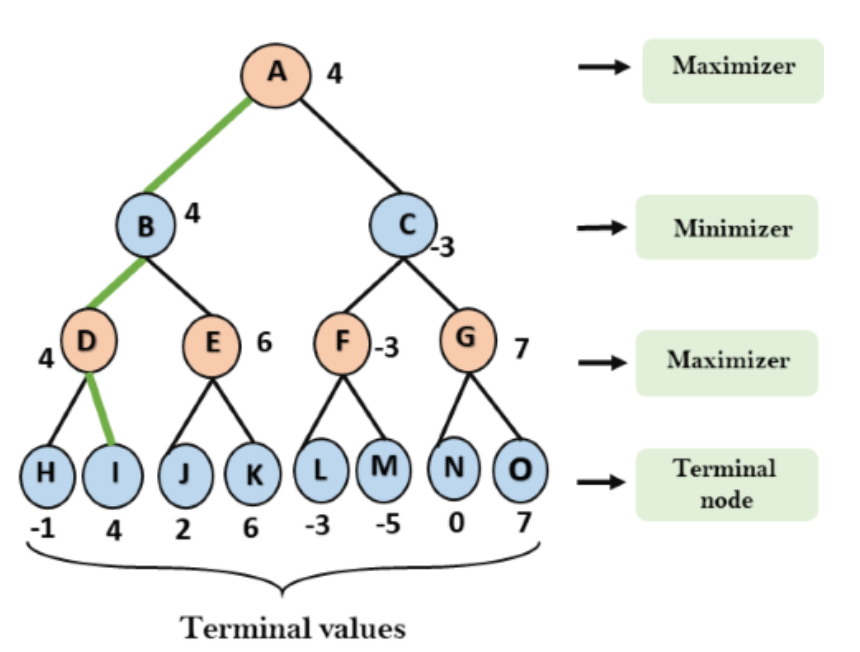

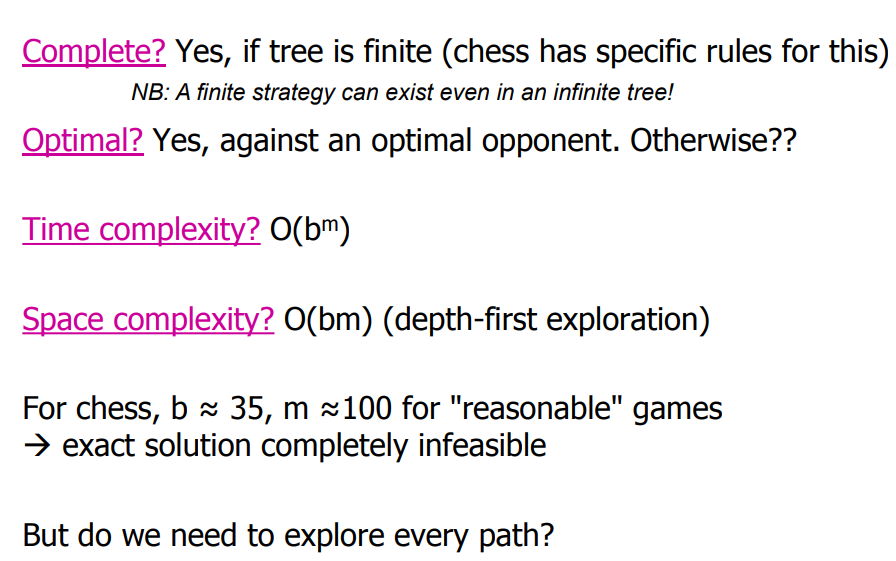

## The α-β Algorithm

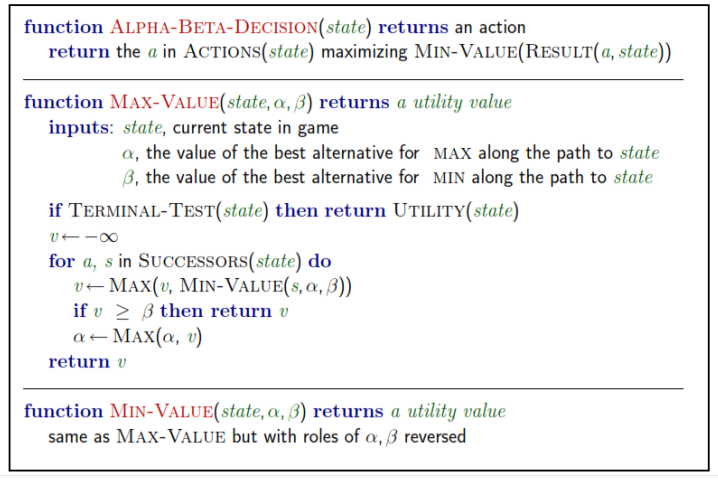

```pseudocode
function minimax(node, depth, isMaximizingPlayer, alpha, beta):
    alpha — Best value for maximizer found so far
    beta — Best value for minimizer found so far

    if node is a leaf node :
        return value of the node
    
    if isMaximizingPlayer :
        bestVal = -INFINITY 
        for each child node :
            value = minimax(node, depth+1, false, alpha, beta)
            bestVal = max(bestVal, value) 
            alpha = max(alpha, bestVal)
            if beta <= alpha:
                break
        return bestVal

    else :
        bestVal = +INFINITY 
        for each child node :
            value = minimax(node, depth+1, true, alpha, beta)
            bestVal = min(bestVal, value) 
            beta = min(beta, bestVal)
            if beta <= alpha:
                break
        return bestVal
```

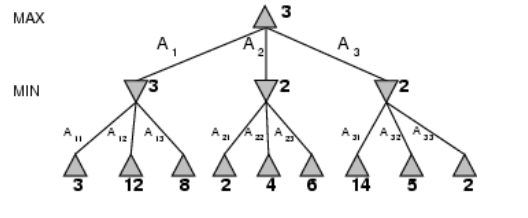

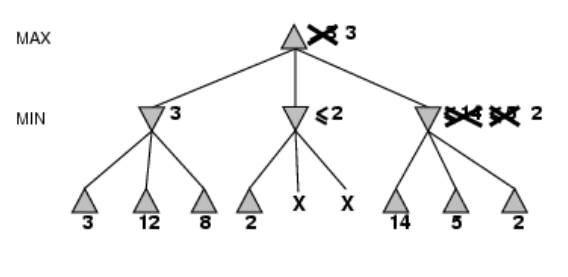

## Properties of α-β

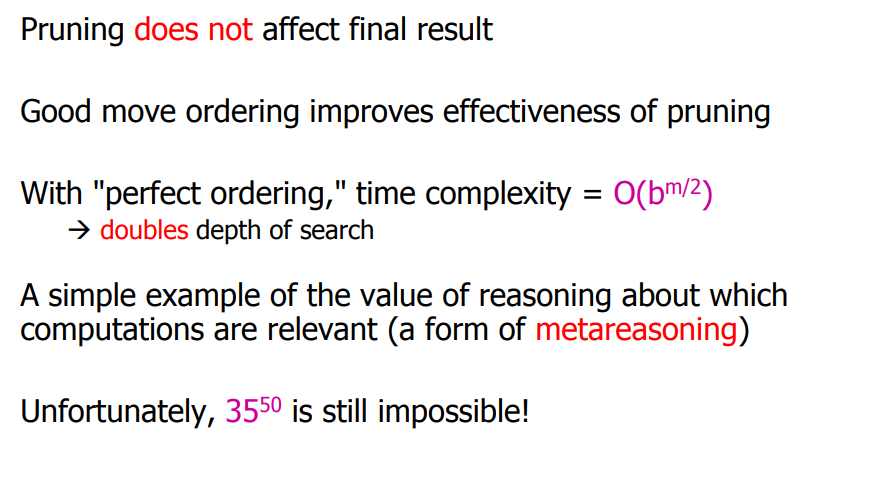

## Example

In [7]:
from typing import Optional
from typing import Self

class Node:
    def __init__(self, value: Optional[float]=None, children: list[Self]=[]):
        self.value = value
        self.children = children
        self.visited = False

    def leaf(self):
        return len(self.children) == 0

def minimax_alpha_beta(node: Node, alpha: float, beta: float, maximizing_player: bool):
    """
    Implements minimax algorithm with alpha-beta pruning.
    
    Args:
        node: Current node in the game tree
        alpha: Best value for maximizer found so far
        beta: Best value for minimizer found so far
        maximizing_player: Boolean indicating if current player is maximizing
    
    Returns:
        Best value for the current node
    """
    node.visited = True
    if node.leaf():
        return node.value
    
    if maximizing_player:
        max_eval = float('-inf')
        for child in node.children:
            eval = minimax_alpha_beta(child, alpha, beta, False)
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return max_eval
    else:
        min_eval = float('inf')
        for child in node.children:
            eval = minimax_alpha_beta(child, alpha, beta, True)
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                break
        return min_eval


def create_example_game_tree():
    leaf1 = Node(3)
    leaf2 = Node(12)
    leaf3 = Node(8)
    leaf4 = Node(2)
    leaf5 = Node(4)
    leaf6 = Node(6)
    leaf7 = Node(14)
    leaf8 = Node(5)
    leaf9 = Node(2)
    
    node1 = Node(children=[leaf1, leaf2, leaf3])
    node2 = Node(children=[leaf4, leaf5, leaf6])
    node3 = Node(children=[leaf7, leaf8, leaf9])
    
    root = Node(children=[node1, node2, node3])
    
    return root

root = create_example_game_tree()
result = minimax_alpha_beta(root, float('-inf'), float('inf'), True)

In [10]:
print(result)

3


In [8]:
def visualize_tree_text(root: Node=root) -> None:
    """
    Creates a text-based visualization of an n-ary tree.
    
    Args:
        root: Root node of the tree
    """
    if not root:
        return
    
    def get_tree_lines(node: Node, level: int = 0, prefix: str = "", is_last: bool = True):
        """Helper function to get lines of the tree drawing."""
        lines = []
        
        # Add current node
        connector = "└── " if is_last else "├── "
        visited = ' visited' if node.visited else ''
        lines.append(prefix + connector + str(node.value) + visited)
        
        # Prepare prefix for children
        children_prefix = prefix + ("    " if is_last else "│   ")
        
        # Process children
        if node.children:
            for i, child in enumerate(node.children):
                is_last_child = (i == len(node.children) - 1)
                lines.extend(get_tree_lines(child, level + 1, children_prefix, is_last_child))
        
        return lines
    
    # Get and print all lines
    result = get_tree_lines(root)
    print('\n'.join(result))

In [9]:
print(visualize_tree_text())

└── None visited
    ├── None visited
    │   ├── 3 visited
    │   ├── 12 visited
    │   └── 8 visited
    ├── None visited
    │   ├── 2 visited
    │   ├── 4
    │   └── 6
    └── None visited
        ├── 14 visited
        ├── 5 visited
        └── 2 visited
None


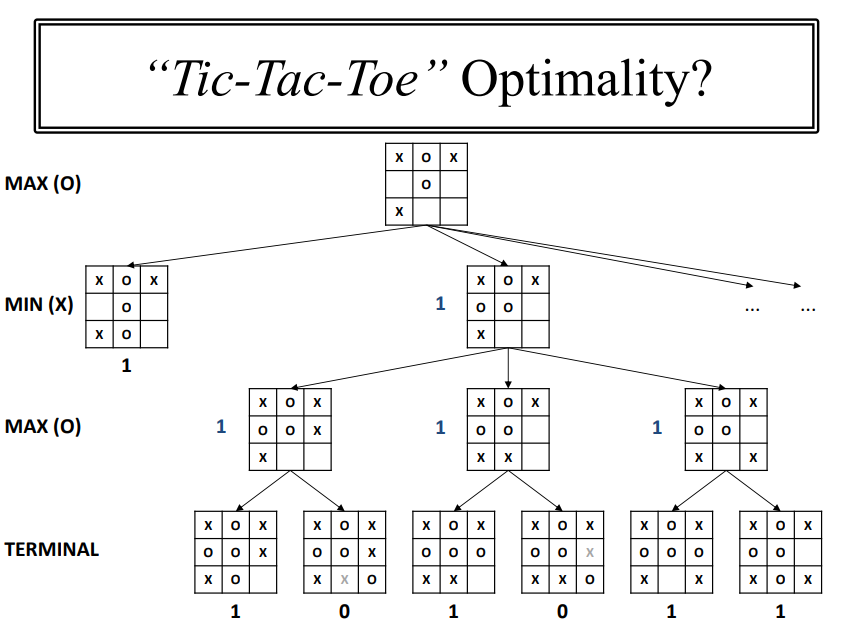

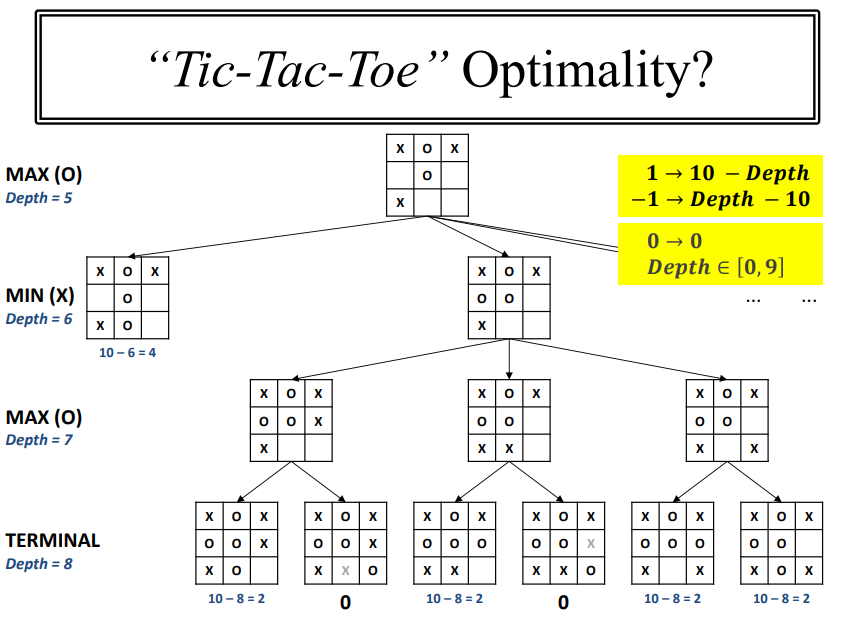

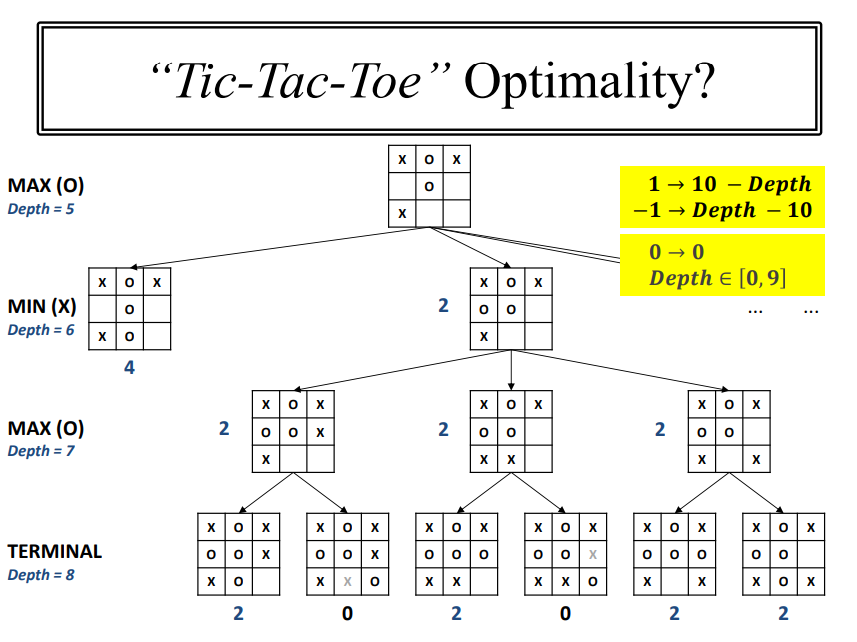